In [2]:
# Leer archivo csv, separado por ";"
df_dist1 <- read.csv(file="corral_2017-12-05_exp-1min.csv", header=TRUE, sep=";", stringsAsFactors=FALSE)
#df_dist5 <- read.csv(file="corral_2017-12-05_exp-5min.csv", header=TRUE, sep=";", stringsAsFactors=FALSE)
#df_dist30 <- read.csv(file="corral_2017-12-05_exp-30min.csv", header=TRUE, sep=";", stringsAsFactors=FALSE)


In [3]:
str(df_dist1)
#head(df_dist)

'data.frame':	1442 obs. of  170 variables:
 $ file_info                                : chr  "filename" "" "2017-12-04T100000_AIU-0962.ghg" "2017-12-04T100000_AIU-0962.ghg" ...
 $ X                                        : chr  "date" "[yyyy-mm-dd]" "2017-12-04" "2017-12-04" ...
 $ X.1                                      : chr  "time" "[HH:MM]" "10:01" "10:02" ...
 $ X.2                                      : chr  "DOY" "[ddd.ddd]" "338.417" "338.417" ...
 $ X.3                                      : chr  "daytime" "[1=daytime]" "1" "1" ...
 $ X.4                                      : chr  "file_records" "[#]" "600" "600" ...
 $ X.5                                      : chr  "used_records" "[#]" "600" "600" ...
 $ corrected_fluxes_and_quality_flags       : chr  "Tau" "[kg+1m-1s-2]" "0.272655288" "0.141851371" ...
 $ X.6                                      : chr  "qc_Tau" "[#]" "1" "1" ...
 $ X.7                                      : chr  "H" "[W+1m-2]" "183.7098613" "57.36261838"

In [4]:
# Eliminar segundo y primer renglón
df_dist1 <- df_dist1[-c(2),]
df_dist1 <- df_dist1[-c(1),]
#df_dist5 <- df_dist5[-c(2),]
#df_dist5 <- df_dist5[-c(1),]
#df_dist30 <- df_dist30[-c(2),]
#df_dist30 <- df_dist30[-c(1),]


In [5]:
# verificar estructura
head(df_dist1)

,file_info,X,X.1,X.2,X.3,X.4,X.5,corrected_fluxes_and_quality_flags,X.6,X.7,⋯,X.140,X.141,X.142,X.143,X.144,X.145,X.146,X.147,X.148,X.149
3,2017-12-04T100000_AIU-0962.ghg,2017-12-04,10:01,338.417,1,600,600,0.272655288,1,183.7098613,⋯,2.49E-04,1.980756367,60.11898053,-484.9515118,6.53E-08,0,0,9983.323584,9983.323584,9983.323584
4,2017-12-04T100000_AIU-0962.ghg,2017-12-04,10:02,338.417,1,600,600,0.141851371,1,57.36261838,⋯,2.50E-04,1.977943418,60.38824439,-549.9450134,0,4.57E-07,0,9983.323584,9983.323584,9983.323584
5,2017-12-04T100000_AIU-0962.ghg,2017-12-04,10:03,338.418,1,600,600,0.191981719,1,174.4876906,⋯,2.52E-04,1.973136333,60.37499617,-498.2835122,0,0,6.53E-08,9983.323584,9983.323584,9983.323584
6,2017-12-04T100000_AIU-0962.ghg,2017-12-04,10:04,338.419,1,600,600,7.61E-02,0,75.00227434,⋯,2.48E-04,1.976459765,59.75230668,-379.9620093,0,0,0,9983.323584,9983.323584,9983.323584
7,2017-12-04T100000_AIU-0962.ghg,2017-12-04,10:05,338.42,1,600,600,0.168015049,1,160.3771015,⋯,2.52E-04,1.974244867,60.06547565,-418.2915102,0,3.92E-07,0,9983.323584,9983.323584,9983.323584
8,2017-12-04T100000_AIU-0962.ghg,2017-12-04,10:06,338.42,1,600,600,0.147780184,1,191.0864328,⋯,2.54E-04,1.979549134,60.20852662,-223.3110055,0,0,0,9983.323584,9983.323584,9983.323584


In [5]:
# date (X), time (X.1), DOY (X.2) 
# Flujos: co2_flux (X.11), ch4_flux (X.15)
# Mixing ratios: co2_mixing_ratio (X.24), ch4_mixing_ratio (X.34)
# Time lags: co2_time_lag (X.25), ch4_time_lag (X.35)
# RH (X.47)
# u* (turbulence)
# La velocidad del viento y dirección: wind_speed (X.54), wind_dir (X.56)
# Convertir columnas a numérico
require(dplyr)
# Select date, time, DOY, co2_flux, ch4_flux, co2_mixing_ratio, co2_time_lag, 
#        ch4_mixing_ratio, ch4_time_lag, wind_speed, wind_dir 
#             

df_corral1 <- subset(df_dist1, select=c("X", "X.1", "X.2", "X.11", "X.15", "X.24", "X.25", 
                                      "X.34", "X.35", "X.54", "X.55", "X.56", "turbulence" ))
names(df_corral1) <- c("date", "hours", "DOY", "co2_flux", "ch4_flux", 
                      "co2_mixing_ratio", "co2_time_lag", "ch4_mixing_ratio", "ch4_time_lag", 
                      "spd", "max_spd", "dir", "u_star")
# Keep only full data (Eliminate NAs)
df_corral1 <- df_corral1[complete.cases(df_corral1), ]
# Create Date, combining date + hours
df_corral1$Date <- as.POSIXct(paste(df_corral1$date, df_corral1$hours), format="%Y-%m-%d %H:%M")
# Convert to numeric rest of columns that were char type
df_corral1[,4:12] <- sapply(df_corral1[,4:12], as.numeric)
#sapply(df_corral, class)



Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:testthat’:

    matches

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
str(df_corral1)
summary(df_corral1)

'data.frame':	1440 obs. of  14 variables:
 $ date            : chr  "2017-12-04" "2017-12-04" "2017-12-04" "2017-12-04" ...
 $ hours           : chr  "10:01" "10:02" "10:03" "10:04" ...
 $ DOY             : chr  "338.417" "338.417" "338.418" "338.419" ...
 $ co2_flux        : num  0.77 2.34 4.61 1.97 7.09 1.1 -0.1 -2.21 -2.14 -0.41 ...
 $ ch4_flux        : num  -0.01 0.01 -0.01 -0.02 -0.01 -0.01 -0.01 -0.01 -0.02 -0.01 ...
 $ co2_mixing_ratio: num  401 401 401 401 401 ...
 $ co2_time_lag    : num  0.3 0.2 0.3 0.3 0.2 0.3 0.1 0.3 0.1 0.2 ...
 $ ch4_mixing_ratio: num  2.02 2.02 2.01 2.01 2.01 ...
 $ ch4_time_lag    : num  0.2 -0.1 -0.1 0.6 -0.1 -0.1 -0.1 -0.1 0.3 -0.1 ...
 $ spd             : num  1.98 1.38 1.57 2.32 1.73 ...
 $ max_spd         : num  4.08 2.84 3.39 3.85 3.94 ...
 $ dir             : num  76.7 58.3 62.4 63.6 62.8 ...
 $ u_star          : chr  "0.487921895" "0.351869315" "0.409444361" "0.25784962" ...
 $ Date            : POSIXct, format: "2017-12-04 10:01:00" "2017-12-04

     date              hours               DOY               co2_flux        
 Length:1440        Length:1440        Length:1440        Min.   :-9999.000  
 Class :character   Class :character   Class :character   1st Qu.:-9999.000  
 Mode  :character   Mode  :character   Mode  :character   Median :    0.015  
                                                          Mean   :-3772.471  
                                                          3rd Qu.:    4.098  
                                                          Max.   :   66.100  
                                                          NA's   :10         
    ch4_flux        co2_mixing_ratio   co2_time_lag     ch4_mixing_ratio   
 Min.   :-9999.00   Min.   :-9999.0   Min.   :-9999.0   Min.   :-9999.000  
 1st Qu.:-9999.00   1st Qu.:-9999.0   1st Qu.:-9999.0   1st Qu.:-9999.000  
 Median :    0.00   Median :  396.9   Median :    0.2   Median :    1.972  
 Mean   :-3778.30   Mean   :-3500.1   Mean   :-3749.5   Mean   :-3824.71

In [6]:
# Eliminate missing numbers -9999
df_corral1[df_corral1 < -5000] <- NA
df_corral1 <- df_corral1[complete.cases(df_corral1), ]
summary(df_corral1)



     date              hours               DOY               co2_flux      
 Length:889         Length:889         Length:889         Min.   :-43.940  
 Class :character   Class :character   Class :character   1st Qu.:  0.140  
 Mode  :character   Mode  :character   Mode  :character   Median :  2.840  
                                                          Mean   :  5.436  
                                                          3rd Qu.:  6.800  
                                                          Max.   : 66.100  
    ch4_flux       co2_mixing_ratio  co2_time_lag    ch4_mixing_ratio
 Min.   :-2.5400   Min.   :375.5    Min.   :0.1000   Min.   :1.936   
 1st Qu.: 0.0000   1st Qu.:397.2    1st Qu.:0.2000   1st Qu.:1.978   
 Median : 0.0700   Median :398.1    Median :0.3000   Median :2.002   
 Mean   : 0.3007   Mean   :399.2    Mean   :0.2525   Mean   :2.087   
 3rd Qu.: 0.2800   3rd Qu.:400.4    3rd Qu.:0.3000   3rd Qu.:2.043   
 Max.   : 8.0100   Max.   :464.6    Max.   :0.50

Loading required package: ggplot2


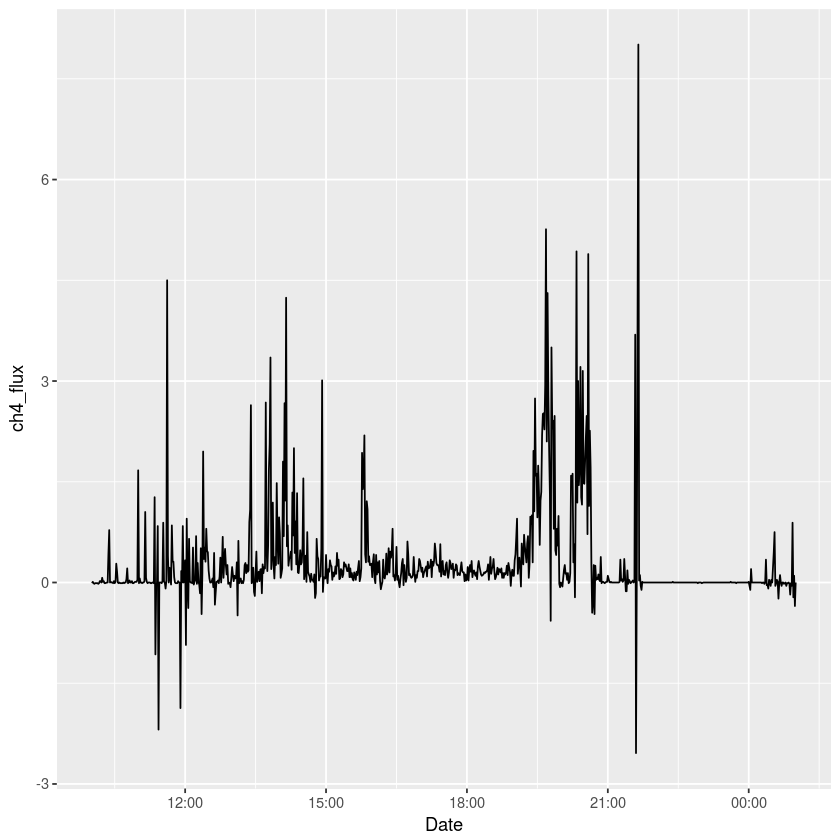

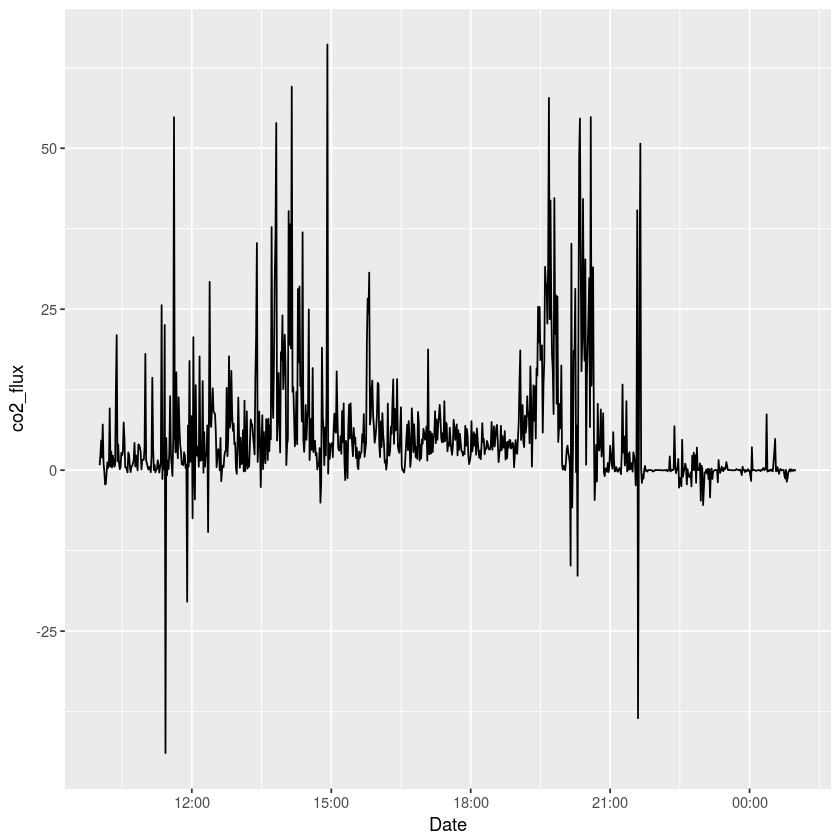

In [7]:
require(ggplot2)
#p1 <- ggplot(df_corral1, aes(Date, ch4_mixing_ratio) ) + geom_line()
p1 <- ggplot(df_corral1, aes(Date, ch4_flux) ) + geom_line()
p2 <- ggplot(df_corral1, aes(Date, co2_flux) ) + geom_line()

print(p1)
print(p2)

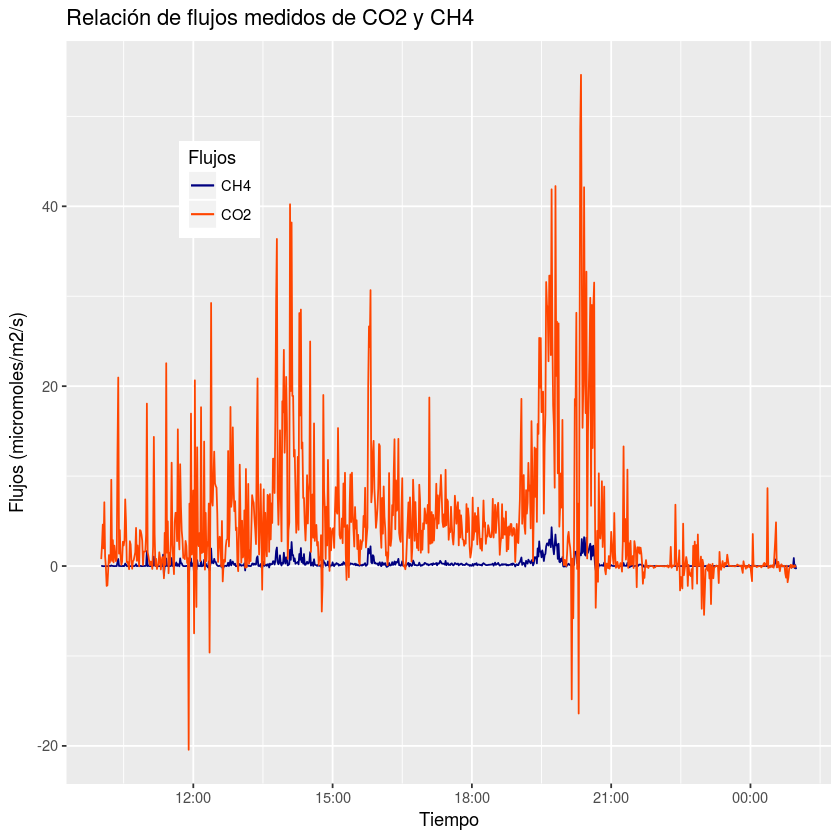

In [8]:
require(oce)
df_corral_period <- subset(df_corral1, Date > "2017-12-04 10:00" & Date < "2017-12-05 1:00")

p <- ggplot(df_corral_period, aes(Date, despike(ch4_flux, reference="smooth"), color="CH4" )) + 
            geom_line() + 
            labs(title = "Relación de flujos medidos de CO2 y CH4", x = "Tiempo", y= "Flujos (micromoles/m2/s)" ) +
            guides(color=guide_legend("Flujos")) + theme(legend.position = c(0.2, 0.8)) +
            scale_colour_manual(values = c("navyblue", "orangered")) 
p <- p + geom_line(data=df_corral_period, aes(Date, despike(co2_flux, reference="smooth"), color="CO2"))
       
print(p)






In [37]:
# ggplot color blind palettes

# The palette with grey:
cbPalette <- c("#999999", "#0072B2", "#E69F00", "#56B4E9", "#009E73", "#F0E442",  "#D55E00", "#CC79A7")

# The palette with black:
#cbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# To use for fills, add
# scale_fill_manual(values=cbPalette)

# To use for line and point colors, add
#scale_colour_manual(values=cbPalette)

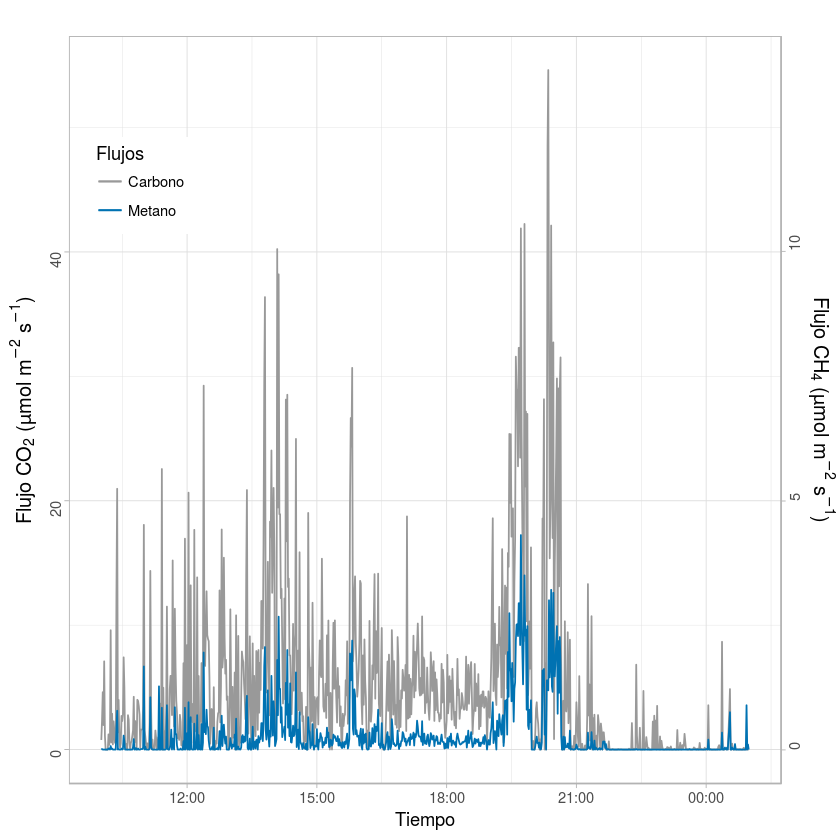

In [38]:
require(oce)
df_corral_period <- subset(df_corral1, Date > "2017-12-04 10:00" & Date < "2017-12-05 1:00")


df_corral_period$ch4_flux[df_corral_period$ch4_flux<0] <- 0
df_corral_period$co2_flux[df_corral_period$co2_flux<0] <- 0
#p <- ggplot(df_corral_period, aes(Date, despike(ch4_flux, reference="smooth"), color="CH4" )) + 
#            geom_line() + 
#            labs(title = "Relación de flujos medidos de CO2 y CH4", x = "Tiempo", y= "Flujos") +
#            guides(color=guide_legend("Flujos")) + theme(legend.position = c(0.2, 0.8))           
#p <- p + geom_line(data=df_corral_period, aes(Date, despike(co2_flux, reference="smooth"), color="CO2"))
        

p <- ggplot(df_corral_period, aes(x=Date)) + theme_light() + theme(axis.text.y=element_text(angle=90,hjust=1)) +
     theme(axis.title.y=element_text(angle=90, color='black', face='bold', size=12))
p <- p + geom_line(linetype="solid", aes(y=despike(co2_flux, reference="smooth"), color= "Carbono")) + 
        labs(title=" ", x = "Tiempo", y= expression(paste("Flujo ", CO[2]," (µmol ", m^-2, " ", s^-1,")"))) +
            guides(color=guide_legend("Flujos")) + theme(legend.position = c(0.1, 0.8))         
p <- p + geom_line(aes(y=despike(4*ch4_flux, reference="smooth"), color="Metano"))
p <- p + theme(axis.title.y=element_text(angle=90, face='bold', size=12)) +
     theme(axis.text.y=element_text(angle=90,hjust=1)) +
     scale_y_continuous(sec.axis = sec_axis(~.*.25, name = expression(paste("Flujo ",CH[4]," (µmol ", m^-2, " ", s^-1,")")))) 
    
#p <- p + scale_colour_manual(values = c("grey", "navyblue")) 
p <- p + scale_colour_manual(values=cbPalette)
print(p)



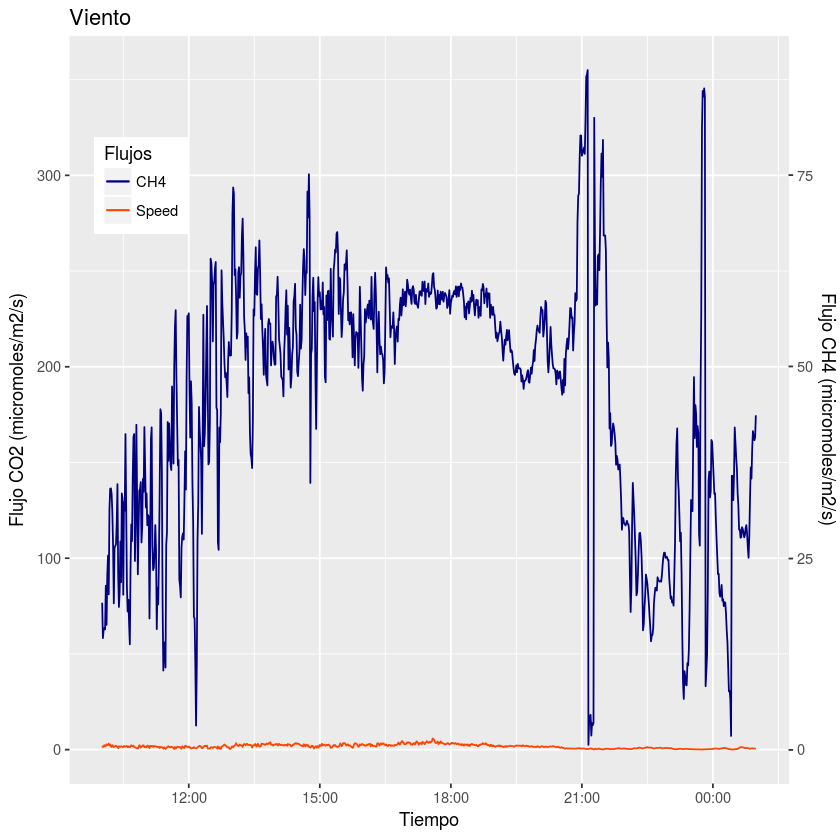

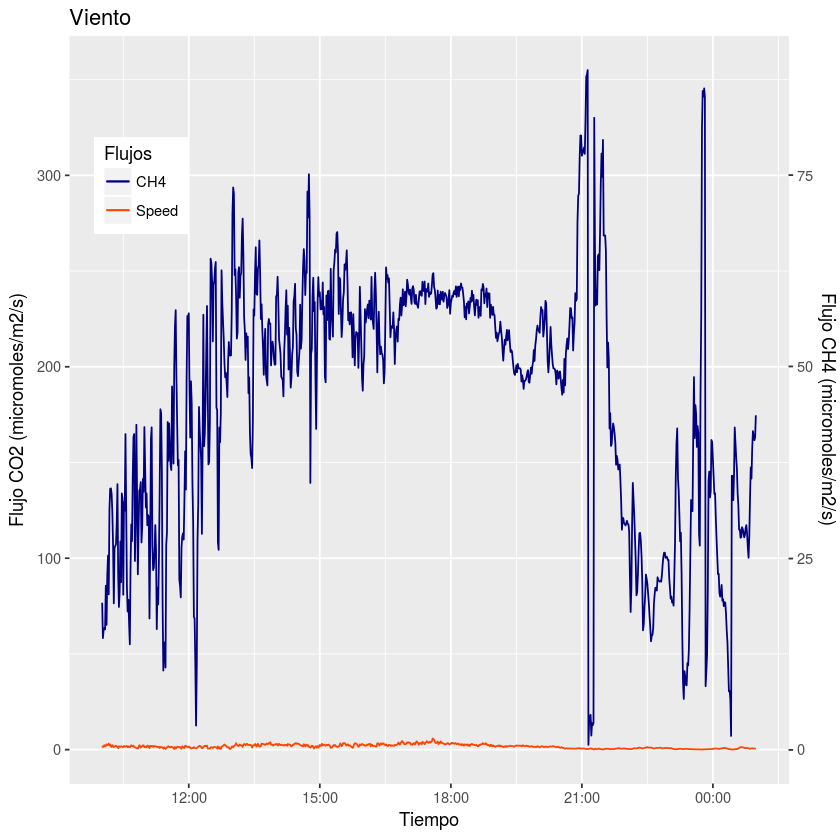

In [10]:
# Wind speed & direction
require(oce)
df_corral_period <- subset(df_corral1, Date > "2017-12-04 10:00" & Date < "2017-12-05 1:00")

#p <- ggplot(df_corral_period, aes(Date, despike(ch4_flux, reference="smooth"), color="CH4" )) + 
#            geom_line() + 
#            labs(title = "Relación de flujos medidos de CO2 y CH4", x = "Tiempo", y= "Flujos") +
#            guides(color=guide_legend("Flujos")) + theme(legend.position = c(0.2, 0.8))           
#p <- p + geom_line(data=df_corral_period, aes(Date, despike(co2_flux, reference="smooth"), color="CO2"))
        

p <- ggplot(df_corral_period, aes(x=Date))
p <- p + geom_line(aes(y=despike(spd, reference="smooth"), color="Speed")) + 
            labs(title = "Viento", x = "Tiempo", y= "Flujo CO2 (micromoles/m2/s)") +
            guides(color=guide_legend("Flujos")) + theme(legend.position = c(0.1, 0.8))            
p <- p + geom_line(aes(y=despike(dir, reference="smooth"), color="CH4"))
p <- p + scale_y_continuous(sec.axis = sec_axis(~.*.25, name = "Flujo CH4 (micromoles/m2/s)")) 

p <- p + scale_colour_manual(values = c("navyblue", "orangered"))
p
print(p)



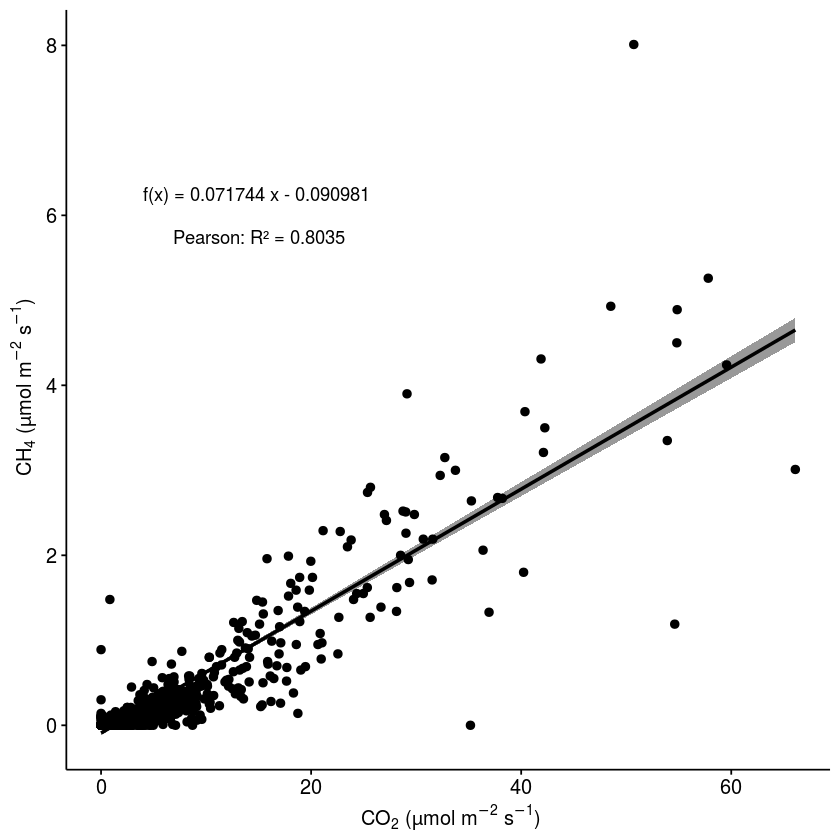

In [70]:
# Correlations
require(oce)
library("ggpubr")
ggscatter(df_corral_period, x = "co2_flux", y = "ch4_flux", color = "black", fill = "lightgray",
          add = "reg.line", conf.int = TRUE, 
          cor.coef = FALSE, cor.method = "pearson",
          xlab = expression(paste(" ",CO[2]," (µmol ", m^-2, " ", s^-1,")")), ylab = expression(paste(" ",CH[4]," (µmol ", m^-2, " ", s^-1,")"))) +
          annotate("text", x = 15, y = 6.25, label = "f(x) = 0.071744 x - 0.090981 ") +
          annotate("text", x = 15, y = 5.75, label = "Pearson: R² = 0.8035")


In [46]:
res <- cor.test(df_corral_period$co2_flux, df_corral_period$ch4_flux, 
                    method = "pearson")
res


	Pearson's product-moment correlation

data:  df_corral_period$co2_flux and df_corral_period$ch4_flux
t = 60.225, df = 886, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8827588 0.9086797
sample estimates:
      cor 
0.8964836 


In [47]:
m1<-lm(co2_flux~ch4_flux,data=df_corral_period)
summary(m1)


Call:
lm(formula = co2_flux ~ ch4_flux, data = df_corral_period)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.153  -2.126  -0.764   1.019  39.145 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1447     0.1456   14.72   <2e-16 ***
ch4_flux     11.2021     0.1860   60.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.96 on 886 degrees of freedom
Multiple R-squared:  0.8037,	Adjusted R-squared:  0.8035 
F-statistic:  3627 on 1 and 886 DF,  p-value: < 2.2e-16


In [51]:
m2<-lm(ch4_flux~co2_flux,data=df_corral_period)
summary(m2)


Call:
lm(formula = ch4_flux ~ co2_flux, data = df_corral_period)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6377 -0.0881  0.0283  0.0910  4.4621 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.090981   0.012640  -7.198  1.3e-12 ***
co2_flux     0.071744   0.001191  60.225  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3169 on 886 degrees of freedom
Multiple R-squared:  0.8037,	Adjusted R-squared:  0.8035 
F-statistic:  3627 on 1 and 886 DF,  p-value: < 2.2e-16


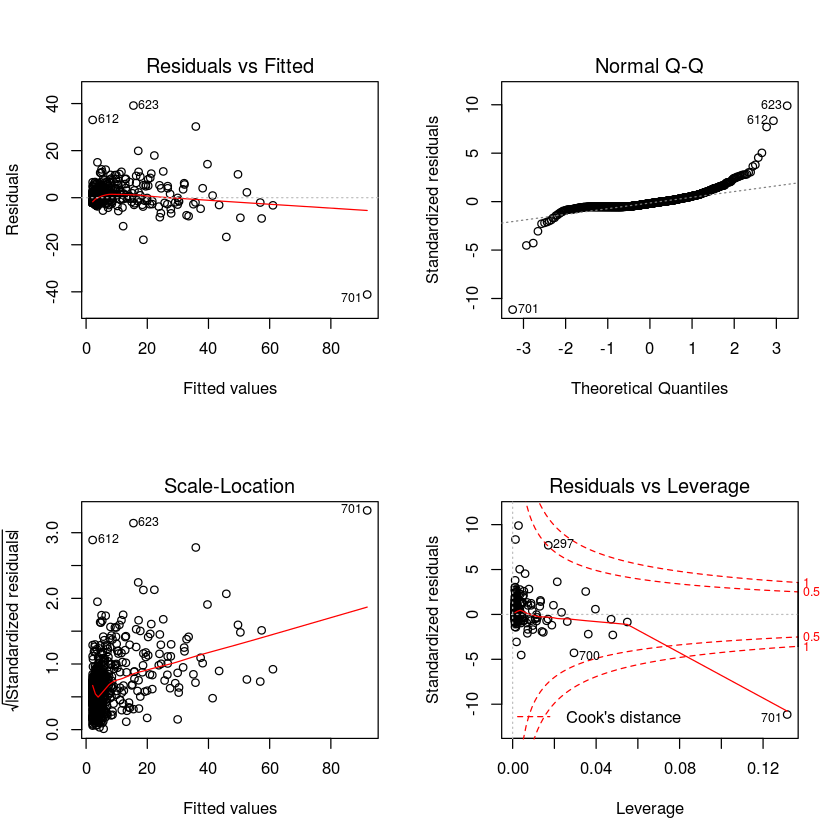

In [49]:
par(mfrow=c(2,2))
plot(m1)

In [ ]:
install.packages('oce', repos='http://cran.us.r-project.org')

In [ ]:
install.packages("devtools", repos="http://cran.itam.mx")

In [ ]:
install.packages("ggthemes", dependencies=TRUE, repos="https://cran.itam.mx")

In [ ]:
library(oce)

In [72]:
install.packages("git2r")

Warning message in install.packages("git2r"):
“installation of package ‘git2r’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(devtools)


In [2]:
library(git2r)

In [3]:
install_github("bcgov/envreportutils")

from URL https://api.github.com/repos/bcgov/envreportutils/zipball/master
Installing envreportutils
Installing svglite
Installing gdtools
'/home/carlos/anaconda3/lib/R/bin/R' --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  '/tmp/RtmpK98wnC/devtools1e9573384c16/gdtools'  \
  --library='/home/carlos/anaconda3/lib/R/library' --install-tests 

Installation failed: Command failed (1)
'/home/carlos/anaconda3/lib/R/bin/R' --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  '/tmp/RtmpK98wnC/devtools1e9567b117ae/svglite'  \
  --library='/home/carlos/anaconda3/lib/R/library' --install-tests 

Installation failed: Command failed (1)
'/home/carlos/anaconda3/lib/R/bin/R' --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  '/tmp/RtmpK98wnC/devtools1e9568a7f0ce/bcgov-envreportutils-cf71f46'  \
  --library='/home/carlos/anaconda3/lib/R/library' --install-tests 

Installation failed: Command failed (1)


In [4]:
devtools::install_github()

ERROR: Error in lapply(repo, github_remote, username = username, ref = ref, subdir = subdir, : argument "repo" is missing, with no default
